In [1]:
import pandas as pd
import numpy as np


In [2]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import sqlite3

In [4]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [5]:
# Utilities
import os
import warnings

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

In [6]:
# Configure matplotlib for better plots
plt.style.use('ggplot')

In [7]:
# Path to SQLite database
db_path = "database.sqlite"

# Establishing a connection
conn = sqlite3.connect(db_path)

In [8]:
# Function to load a table into a DataFrame
def load_table(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql_query(query, conn)

In [9]:
# Loading all tables into DataFrames
player_attributes_df = load_table("Player_Attributes")
player_df = load_table("Player")
match_df = load_table("Match")
league_df = load_table("League")
country_df = load_table("Country")
team_df = load_table("Team")
team_attributes_df = load_table("Team_Attributes")

In [10]:
# Previewing loaded data
print("Player Attributes DataFrame:")
print(player_attributes_df)



Player Attributes DataFrame:
            id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
...        ...                 ...            ...                  ...   
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
0         

In [11]:
# Checking missing values in Player_Attributes
missing_values_summary = player_attributes_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             

In [12]:
# Filling missing values for numerical columns
numerical_columns_to_fill = [
    'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
    'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
    'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
    'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
]
player_attributes_df[numerical_columns_to_fill] = player_attributes_df[numerical_columns_to_fill].fillna(
    player_attributes_df[numerical_columns_to_fill].mean()
)

# Filling missing values for categorical columns
categorical_columns_to_fill = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for col in categorical_columns_to_fill:
    player_attributes_df[col] = player_attributes_df[col].fillna(player_attributes_df[col].mode()[0])

# Verifying that all missing values are handled
print("Remaining Missing Values:")
print(player_attributes_df.isnull().sum().sum())

Remaining Missing Values:
0


In [13]:
# Preview cleaned data
print("\nCleaned Player_Attributes DataFrame:")
print(player_attributes_df)


Cleaned Player_Attributes DataFrame:
            id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
...        ...                 ...            ...                  ...   
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
0

In [14]:
# Checking missing values in Player_Attributes
missing_values_summary = player_attributes_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [15]:
# Checking missing values in Player_Attributes
missing_values_summary = player_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [16]:
# Checking missing values in Player_Attributes
missing_values_summary = match_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
home_player_X1     1821
home_player_X2     1821
home_player_X3     1832
home_player_X4     1832
home_player_X5     1832
                  ...  
GBD               11817
GBA               11817
BSH               11818
BSD               11818
BSA               11818
Length: 104, dtype: int64


In [17]:
# Threshold for dropping columns (optional)
threshold = 0.5

# Dropping columns with more than 50% missing values
columns_to_drop = match_df.columns[match_df.isnull().mean() > threshold]
match_df = match_df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

# Filling missing values for remaining numerical columns with mean
numerical_columns = match_df.select_dtypes(include=['int64', 'float64']).columns
match_df[numerical_columns] = match_df[numerical_columns].fillna(match_df[numerical_columns].mean())

# Filling missing values for categorical columns with mode
categorical_columns = match_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    match_df[col] = match_df[col].fillna(match_df[col].mode()[0])

# Verifying that all missing values are handled
print("Remaining Missing Values in Match DataFrame:")
print(match_df.isnull().sum().sum())

Dropped columns: Index(['PSH', 'PSD', 'PSA'], dtype='object')
Remaining Missing Values in Match DataFrame:
0


In [18]:
# Checking missing values in Player_Attributes
missing_values_summary = match_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [19]:
# Checking missing values in Player_Attributes
missing_values_summary = league_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [20]:
# Checking missing values in Player_Attributes
missing_values_summary = country_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [21]:
# Checking missing values in Player_Attributes
missing_values_summary = team_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
team_fifa_api_id    11
dtype: int64


In [22]:
# Checking unique values in the column
print("Unique values in team_fifa_api_id before filling:")
print(team_df['team_fifa_api_id'].unique())

# Filling missing values in `team_fifa_api_id` with the median
team_df['team_fifa_api_id'].fillna(team_df['team_fifa_api_id'].median(), inplace=True)

# Verifying no missing values remain
print("\nRemaining Missing Values in team_df:")
print(team_df.isnull().sum().sum())

Unique values in team_fifa_api_id before filling:
[6.73000e+02 6.75000e+02 1.50050e+04 2.00700e+03 1.75000e+03 2.29000e+02
 6.74000e+02 1.74700e+03         nan 2.32000e+02 1.10724e+05 2.31000e+02
 5.46000e+02 1.00081e+05 1.11560e+05 6.81000e+02 6.70000e+02 6.80000e+02
 2.39000e+02 2.01300e+03 1.00087e+05 1.10913e+05 6.82000e+02 1.10000e+01
 1.30000e+01 1.00000e+00 1.09000e+02 1.06000e+02 9.00000e+00 1.90000e+01
 1.91700e+03 2.00000e+00 1.00000e+01 7.00000e+00 3.00000e+00 1.20000e+01
 1.80000e+01 4.00000e+00 1.80600e+03 1.95200e+03 1.44000e+02 5.00000e+00
 1.79000e+03 8.80000e+01 1.10000e+02 1.79600e+03 1.92600e+03 1.96000e+03
 1.50000e+01 1.79200e+03 1.70000e+01 1.79300e+03 1.79900e+03 1.96100e+03
 9.50000e+01 1.94300e+03 1.79500e+03 5.70000e+01 7.10000e+01 5.90000e+01
 2.10000e+02 1.73800e+03 7.20000e+01 1.73900e+03 2.17000e+02 6.60000e+01
 1.80900e+03 6.90000e+01 7.30000e+01 1.82300e+03 6.50000e+01 7.40000e+01
 2.19000e+02 2.26000e+02 1.80500e+03 1.10456e+05 1.81900e+03 6.40000e+01
 

In [23]:
# Checking missing values in Player_Attributes
missing_values_summary = team_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [24]:
# Checking missing values in Player_Attributes
missing_values_summary = team_attributes_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
buildUpPlayDribbling    969
dtype: int64


In [25]:
# Check the distribution of `buildUpPlayDribbling`
print("Summary statistics for buildUpPlayDribbling:")
print(team_attributes_df['buildUpPlayDribbling'].describe())

# Filling missing values with the median
team_attributes_df['buildUpPlayDribbling'].fillna(team_attributes_df['buildUpPlayDribbling'].median(), inplace=True)

# Verifying no missing values remain
print("\nRemaining Missing Values in Team_Attributes:")
print(team_attributes_df.isnull().sum().sum())


Summary statistics for buildUpPlayDribbling:
count    489.000000
mean      48.607362
std        9.678290
min       24.000000
25%       42.000000
50%       49.000000
75%       55.000000
max       77.000000
Name: buildUpPlayDribbling, dtype: float64

Remaining Missing Values in Team_Attributes:
0


In [26]:
# Checking missing values in Player_Attributes
missing_values_summary = team_attributes_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values_summary[missing_values_summary > 0])

Missing Values Summary:
Series([], dtype: int64)


In [27]:
# Extracting relevant columns
player_performance_df = player_attributes_df[['player_api_id', 'date', 'overall_rating', 'potential']]

# Convert `date` column to datetime for analysis
player_performance_df['date'] = pd.to_datetime(player_performance_df['date'])

# Analyzing top players
top_players = player_performance_df.groupby('player_api_id')['overall_rating'].mean().sort_values(ascending=False).head(10).index
top_players_df = player_performance_df[player_performance_df['player_api_id'].isin(top_players)]


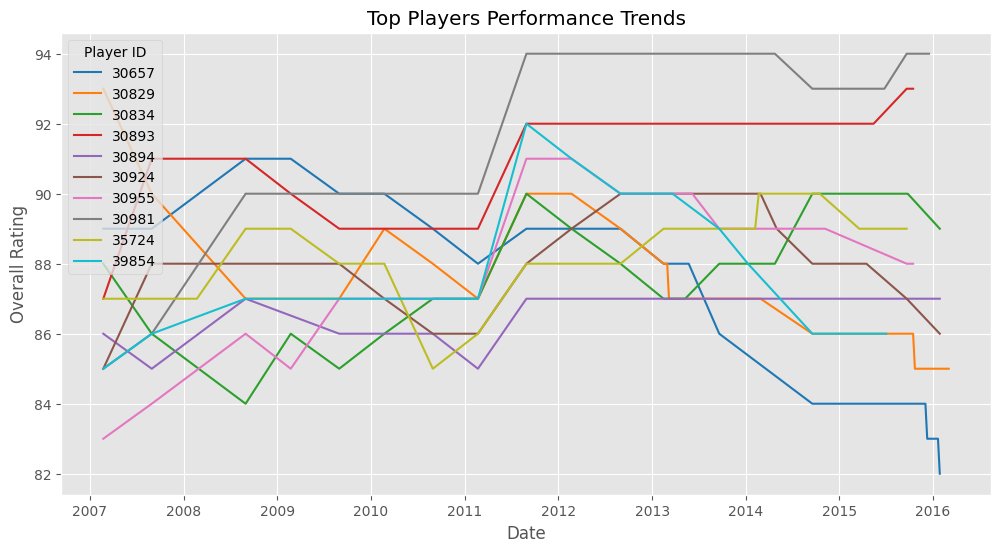

In [28]:
# Visualizing player performance trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_players_df, x='date', y='overall_rating', hue='player_api_id', palette='tab10')
plt.title('Top Players Performance Trends')
plt.xlabel('Date')
plt.ylabel('Overall Rating')
plt.legend(title='Player ID')
plt.show()

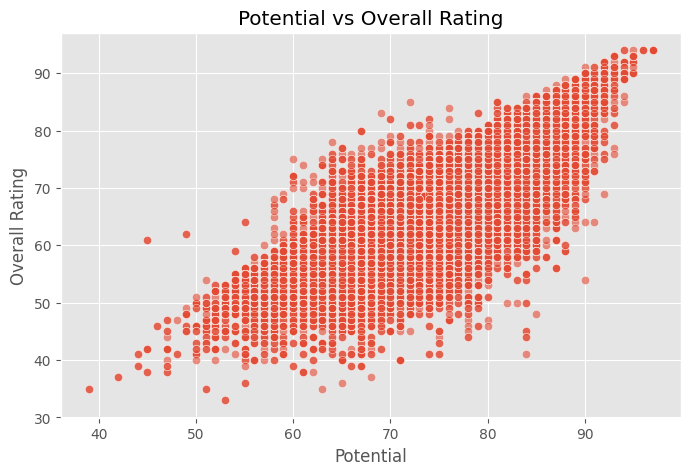

In [29]:
# Visualizing potential vs overall rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=player_performance_df, x='potential', y='overall_rating', alpha=0.6)
plt.title('Potential vs Overall Rating')
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.show()

In [30]:
# Calculating the difference between overall_rating and potential
player_performance_df['rating_difference'] = player_performance_df['overall_rating'] - player_performance_df['potential']

# Identifying overachieving players (largest positive difference)
overachievers = player_performance_df.groupby('player_api_id')['rating_difference'].mean().sort_values(ascending=False).head(10)

# Identifying underachieving players (largest negative difference)
underachievers = player_performance_df.groupby('player_api_id')['rating_difference'].mean().sort_values(ascending=True).head(10)

print("Top Overachieving Players (Average Difference):")
print(overachievers)

print("\nTop Underachieving Players (Average Difference):")
print(underachievers)

Top Overachieving Players (Average Difference):
player_api_id
34969    5.300000
35409    4.800000
24663    4.428305
30897    4.200000
36091    4.111111
39538    3.875000
30901    3.875000
32587    3.793296
40161    3.666667
33424    3.213966
Name: rating_difference, dtype: float64

Top Underachieving Players (Average Difference):
player_api_id
107416   -29.250000
116011   -24.000000
177471   -23.750000
127189   -23.250000
23093    -23.250000
94281    -22.333333
742405   -22.000000
132830   -21.666667
637753   -21.428571
575789   -21.142857
Name: rating_difference, dtype: float64


In [31]:
# Identifying most consistent performers (lowest standard deviation)
consistent_players = player_performance_df.groupby('player_api_id')['overall_rating'].std().sort_values().head(10)

print("\nMost Consistent Performers (Lowest Std Dev in Overall Rating):")
print(consistent_players)


Most Consistent Performers (Lowest Std Dev in Overall Rating):
player_api_id
750584    0.0
29669     0.0
474671    0.0
183701    0.0
473937    0.0
473851    0.0
470836    0.0
470814    0.0
185909    0.0
470720    0.0
Name: overall_rating, dtype: float64


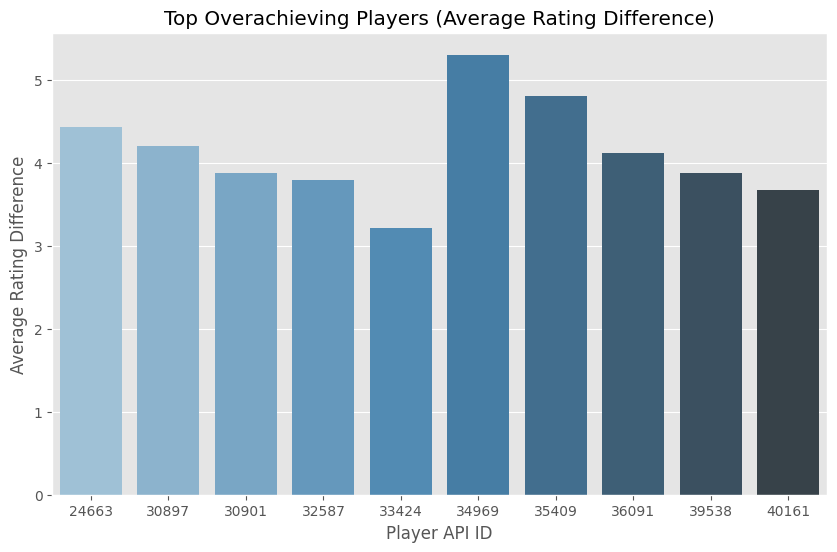

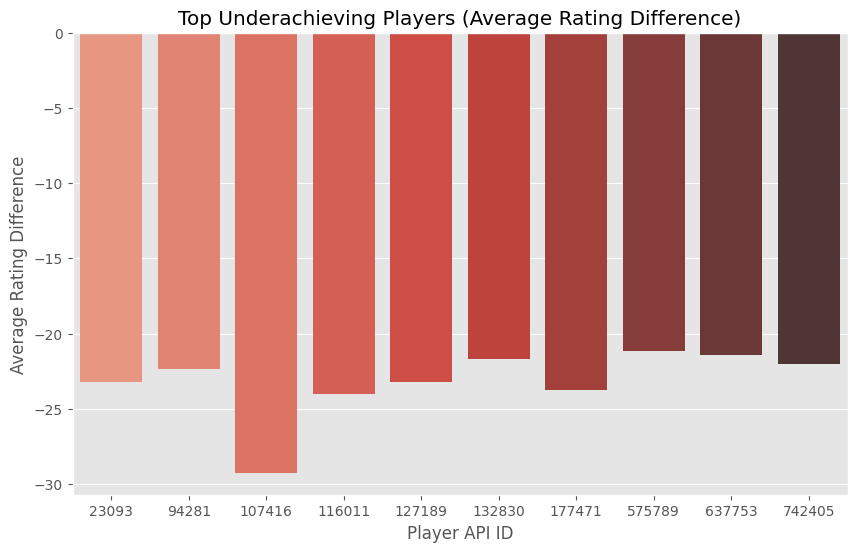

In [32]:
# Preparing data for visualization
overachievers_df = overachievers.reset_index()
underachievers_df = underachievers.reset_index()

# Plotting Overachievers
plt.figure(figsize=(10, 6))
sns.barplot(data=overachievers_df, x='player_api_id', y='rating_difference', palette='Blues_d')
plt.title('Top Overachieving Players (Average Rating Difference)')
plt.xlabel('Player API ID')
plt.ylabel('Average Rating Difference')
plt.show()

# Plotting Underachievers
plt.figure(figsize=(10, 6))
sns.barplot(data=underachievers_df, x='player_api_id', y='rating_difference', palette='Reds_d')
plt.title('Top Underachieving Players (Average Rating Difference)')
plt.xlabel('Player API ID')
plt.ylabel('Average Rating Difference')
plt.show()

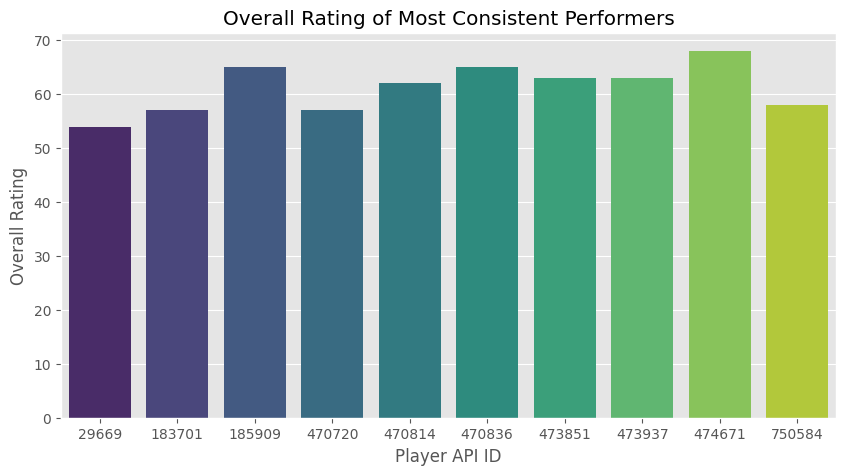

In [33]:
# Filter consistent performers data
consistent_df = player_performance_df[player_performance_df['player_api_id'].isin(consistent_players.index)]

# Plotting overall rating for consistent performers
plt.figure(figsize=(10, 5))
sns.barplot(
    data=consistent_df.groupby('player_api_id')['overall_rating'].mean().reset_index(),
    x='player_api_id', y='overall_rating', palette='viridis'
)
plt.title('Overall Rating of Most Consistent Performers')
plt.xlabel('Player API ID')
plt.ylabel('Overall Rating')
plt.show()

In [34]:
# Defining overachiever and underachiever player IDs
overachiever_ids = [34969, 35409, 24663, 30897, 36091, 39538, 30901, 32587, 40161, 33424]
underachiever_ids = [107416, 116011, 177471, 127189, 23093, 94281, 742405, 132830, 637753, 575789]

# Combine the two groups
player_ids = overachiever_ids + underachiever_ids

# Load additional tables for analysis
match_df = load_table("Match")
league_df = load_table("League")
team_df = load_table("Team")

# Extract matches involving overachievers and underachievers
player_matches = match_df[
    match_df[['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
              'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
              'home_player_9', 'home_player_10', 'home_player_11',
              'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
              'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
              'away_player_9', 'away_player_10', 'away_player_11']].isin(player_ids).any(axis=1)
]

In [35]:
# Merge with league information to get league names
player_matches = player_matches.merge(league_df, left_on='league_id', right_on='id', suffixes=('', '_league'))

# Group by player_id and league name
home_players = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
                'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
                'home_player_9', 'home_player_10', 'home_player_11']
away_players = ['away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
                'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
                'away_player_9', 'away_player_10', 'away_player_11']


In [36]:
# Melt the player columns for easier analysis
home_matches = player_matches.melt(
    id_vars=['id', 'league_id', 'name'], value_vars=home_players, var_name='home_position', value_name='player_api_id'
).dropna()
away_matches = player_matches.melt(
    id_vars=['id', 'league_id', 'name'], value_vars=away_players, var_name='away_position', value_name='player_api_id'
).dropna()

# Combine home and away matches
all_player_matches = pd.concat([home_matches, away_matches])

In [37]:
# Filter for overachievers and underachievers
analyzed_matches = all_player_matches[all_player_matches['player_api_id'].isin(player_ids)]

# Group by player and league
player_league_summary = analyzed_matches.groupby(['player_api_id', 'name']).size().reset_index(name='matches_played')

# Display results
print(player_league_summary)

    player_api_id                      name  matches_played
0         23093.0   Scotland Premier League               4
1         24663.0    England Premier League              11
2         30897.0            France Ligue 1              38
3         30897.0           Spain LIGA BBVA               5
4         30901.0    England Premier League              18
5         32587.0            France Ligue 1              12
6         32587.0  Switzerland Super League              33
7         33424.0            France Ligue 1               8
8         33424.0  Switzerland Super League              47
9         34969.0             Italy Serie A               6
10        34969.0           Spain LIGA BBVA               2
11        35409.0            France Ligue 1              13
12        36091.0     Germany 1. Bundesliga               9
13        39538.0             Italy Serie A              21
14        40161.0    Netherlands Eredivisie               9
15        94281.0    Belgium Jupiler Lea

In [38]:
# Merge the rating differences with the league summary
player_rating_difference = pd.DataFrame({
    'player_api_id': overachiever_ids + underachiever_ids,
    'rating_difference': overachievers.tolist() + underachievers.tolist()
})
league_analysis = player_league_summary.merge(
    player_rating_difference, on='player_api_id', how='left'
)

# Aggregate rating differences by league
league_rating_summary = league_analysis.groupby('name')['rating_difference'].mean().reset_index()
league_rating_summary = league_rating_summary.rename(columns={'name': 'league_name', 'rating_difference': 'avg_rating_difference'})

# Display league analysis
print("League-wise Average Rating Difference:")
print(league_rating_summary)

League-wise Average Rating Difference:
                league_name  avg_rating_difference
0    Belgium Jupiler League             -25.791667
1    England Premier League              -8.709888
2            France Ligue 1              -1.598548
3     Germany 1. Bundesliga              -8.658730
4             Italy Serie A               4.587500
5    Netherlands Eredivisie               3.666667
6   Scotland Premier League             -23.250000
7           Spain LIGA BBVA               4.750000
8  Switzerland Super League             -12.331881


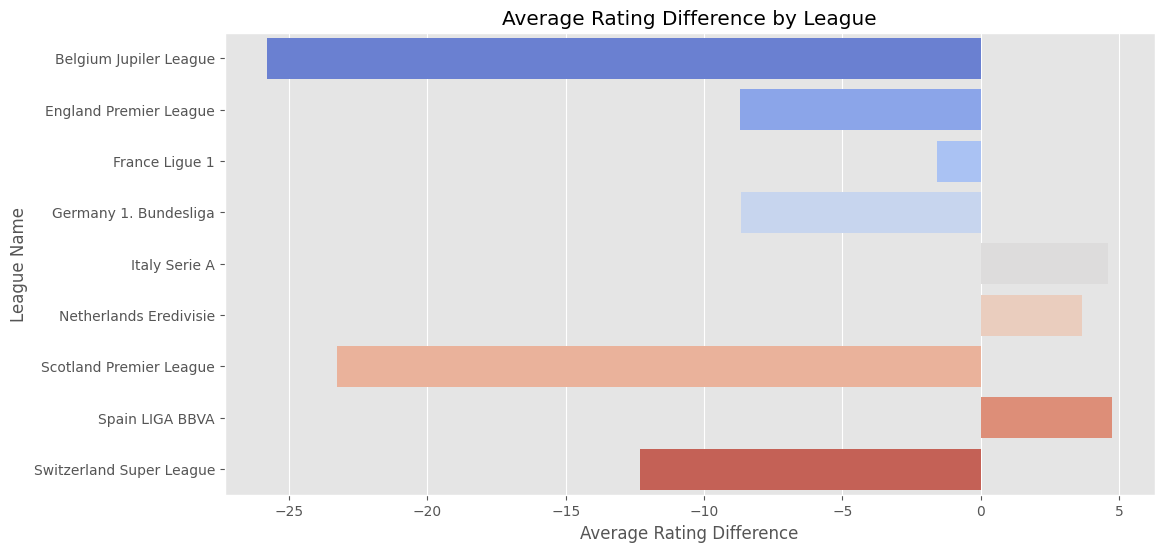

In [39]:
# Visualize league-wise rating differences
plt.figure(figsize=(12, 6))
sns.barplot(data=league_rating_summary, x='avg_rating_difference', y='league_name', palette='coolwarm')
plt.title('Average Rating Difference by League')
plt.xlabel('Average Rating Difference')
plt.ylabel('League Name')
plt.show()

In [40]:
# Filter data for specific leagues
underperforming_leagues = ["Belgium Jupiler League", "Scotland Premier League"]
overperforming_leagues = ["Spain LIGA BBVA", "Italy Serie A"]

# Investigate players in underperforming leagues
underperformers_in_leagues = league_analysis[
    league_analysis['name'].isin(underperforming_leagues)
].sort_values(by='rating_difference')

# Investigate players in overperforming leagues
overperformers_in_leagues = league_analysis[
    league_analysis['name'].isin(overperforming_leagues)
].sort_values(by='rating_difference', ascending=False)

# Displaying results for underperformers
print("Underperformers in Key Leagues:")
print(underperformers_in_leagues)

# Displaying results for overperformers
print("\nOverperformers in Key Leagues:")
print(overperformers_in_leagues)

Underperformers in Key Leagues:
    player_api_id                     name  matches_played  rating_difference
16       107416.0   Belgium Jupiler League               1         -29.250000
0         23093.0  Scotland Premier League               4         -23.250000
15        94281.0   Belgium Jupiler League               3         -22.333333

Overperformers in Key Leagues:
    player_api_id             name  matches_played  rating_difference
9         34969.0    Italy Serie A               6              5.300
10        34969.0  Spain LIGA BBVA               2              5.300
3         30897.0  Spain LIGA BBVA               5              4.200
13        39538.0    Italy Serie A              21              3.875


In [41]:
# Map player_api_id to player_name from the Player table
player_id_to_name = player_df.set_index('player_api_id')['player_name'].to_dict()

# Add player names to the league analysis data
underperformers_in_leagues['player_name'] = underperformers_in_leagues['player_api_id'].map(player_id_to_name)
overperformers_in_leagues['player_name'] = overperformers_in_leagues['player_api_id'].map(player_id_to_name)


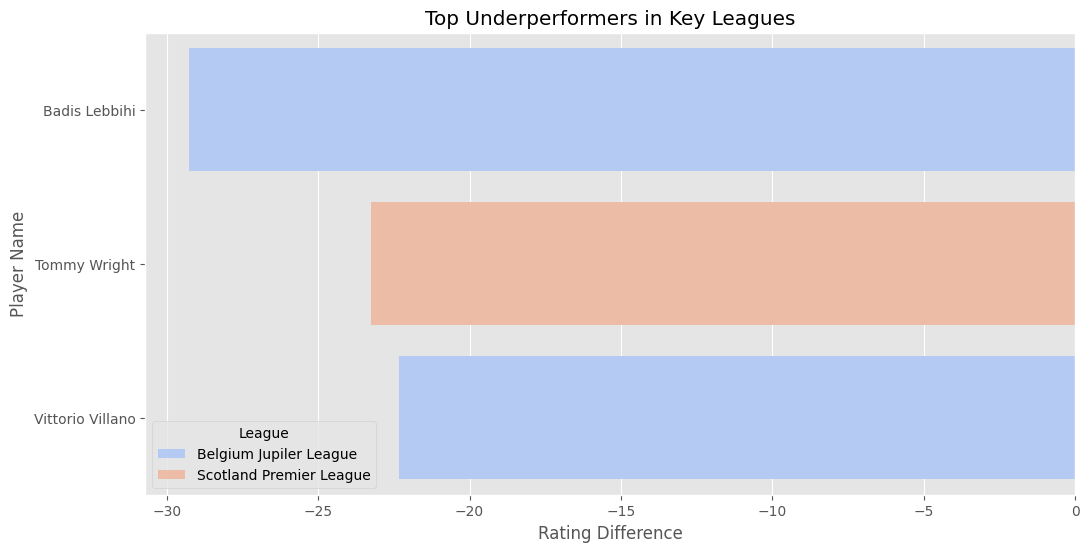

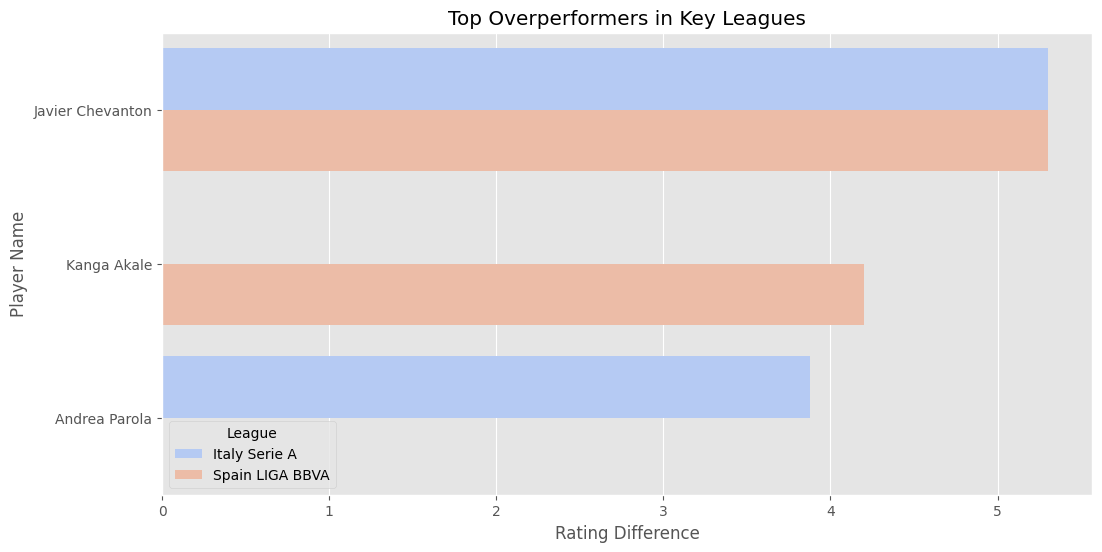

In [42]:
# Visualization for Underperformers with Player Names
plt.figure(figsize=(12, 6))
sns.barplot(
    data=underperformers_in_leagues.head(10),
    x='rating_difference',
    y='player_name',
    hue='name',
    palette='coolwarm'
)
plt.title('Top Underperformers in Key Leagues')
plt.xlabel('Rating Difference')
plt.ylabel('Player Name')
plt.legend(title='League')
plt.show()

# Visualization for Overperformers with Player Names
plt.figure(figsize=(12, 6))
sns.barplot(
    data=overperformers_in_leagues.head(10),
    x='rating_difference',
    y='player_name',
    hue='name',
    palette='coolwarm'
)
plt.title('Top Overperformers in Key Leagues')
plt.xlabel('Rating Difference')
plt.ylabel('Player Name')
plt.legend(title='League')
plt.show()

In [43]:
# Extract matches for top underperformers and overperformers
top_players = underperformers_in_leagues['player_api_id'].tolist() + overperformers_in_leagues['player_api_id'].tolist()

# Filter matches involving these players
player_matches = match_df[
    match_df[['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
              'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
              'home_player_9', 'home_player_10', 'home_player_11',
              'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
              'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
              'away_player_9', 'away_player_10', 'away_player_11']].isin(top_players).any(axis=1)
]

In [44]:
# Add player details to the matches
player_details = player_df[['player_api_id', 'player_name']].set_index('player_api_id').to_dict()['player_name']

# Melt the player columns for easier analysis
home_players = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
                'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
                'home_player_9', 'home_player_10', 'home_player_11']
away_players = ['away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
                'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
                'away_player_9', 'away_player_10', 'away_player_11']


In [45]:
# Unpivot home and away players for easy analysis
player_match_data = pd.concat([
    player_matches.melt(id_vars=['id', 'league_id', 'season', 'date'], value_vars=home_players, var_name='position', value_name='player_api_id'),
    player_matches.melt(id_vars=['id', 'league_id', 'season', 'date'], value_vars=away_players, var_name='position', value_name='player_api_id')
])


In [46]:
# Add player names
player_match_data['player_name'] = player_match_data['player_api_id'].map(player_details)


In [47]:
# Filter for top players
top_player_match_data = player_match_data[player_match_data['player_api_id'].isin(top_players)]

# Display results
print("\nMatch-Level Data for Top Overperformers and Underperformers:")
print(top_player_match_data)


Match-Level Data for Top Overperformers and Underperformers:
        id  league_id     season                 date        position  \
504   5561       4769  2010/2011  2010-11-07 00:00:00   home_player_7   
530  10514      10257  2008/2009  2009-04-19 00:00:00   home_player_7   
536  10709      10257  2009/2010  2009-12-12 00:00:00   home_player_7   
538  10763      10257  2009/2010  2010-01-16 00:00:00   home_player_7   
544  10914      10257  2009/2010  2010-04-18 00:00:00   home_player_7   
..     ...        ...        ...                  ...             ...   
780  10777      10257  2009/2010  2010-01-31 00:00:00  away_player_10   
800    152          1  2008/2009  2009-02-28 00:00:00  away_player_11   
868  11245      10257  2010/2011  2010-09-19 00:00:00  away_player_11   
870  19834      19694  2008/2009  2009-03-21 00:00:00  away_player_11   
879  21652      21518  2008/2009  2009-02-01 00:00:00  away_player_11   

     player_api_id       player_name  
504        30897.0    

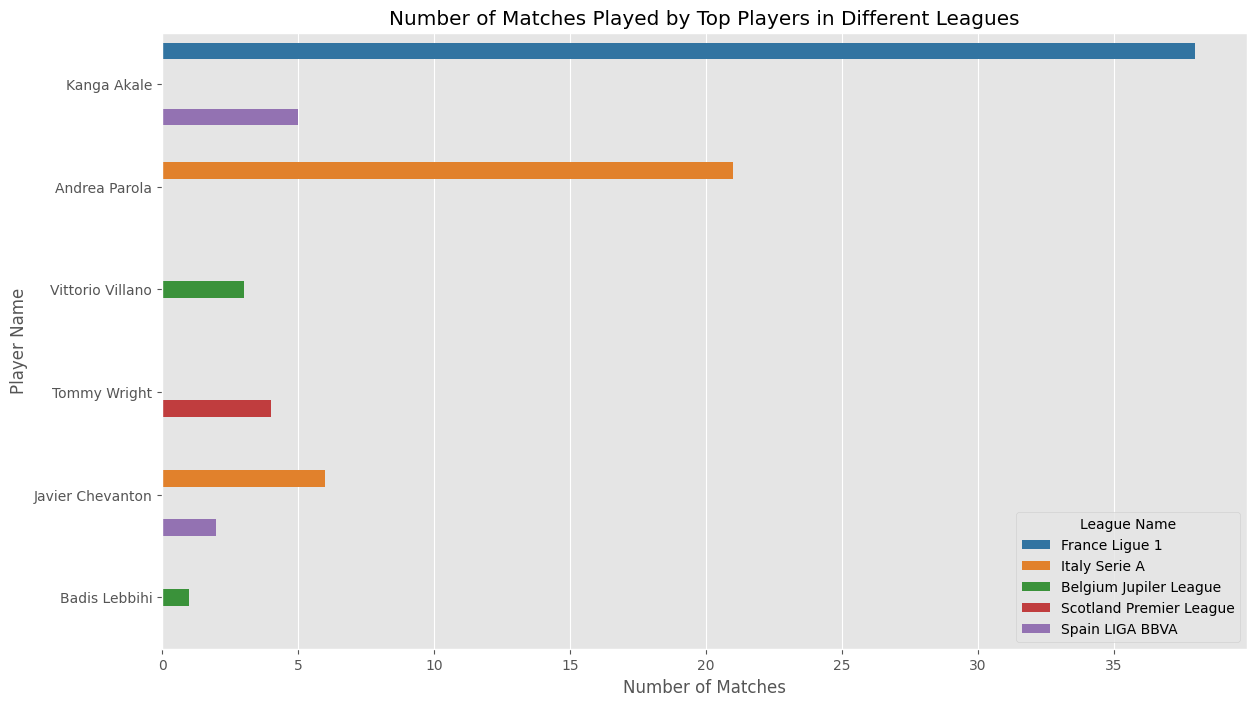

In [48]:
# Merge league names into the match-level data
league_details = league_df[['id', 'name']].set_index('id').to_dict()['name']
top_player_match_data['league_name'] = top_player_match_data['league_id'].map(league_details)

# Visualization 1: Matches by Players and Leagues (Using League Names)
plt.figure(figsize=(14, 8))
sns.countplot(data=top_player_match_data, y='player_name', hue='league_name', palette='tab10')
plt.title('Number of Matches Played by Top Players in Different Leagues')
plt.xlabel('Number of Matches')
plt.ylabel('Player Name')
plt.legend(title='League Name')
plt.show()

In [49]:
# Calculate average rating difference per season
player_season_performance = (
    top_player_match_data.groupby(['player_name', 'season'])
    .agg(matches=('player_api_id', 'count'), avg_rating_difference=('player_api_id', 'mean'))
    .reset_index()
)

# Create an interactive plot
fig = px.line(
    player_season_performance,
    x="season",
    y="matches",
    color="player_name",
    markers=True,
    line_shape="linear",
    title="Player Match Participation and Performance per Season",
    labels={"season": "Season", "matches": "Number of Matches", "player_name": "Player Name"},
    hover_data={"avg_rating_difference": True},
)

# Add annotations for key players with notable trends
key_players = player_season_performance.loc[
    player_season_performance['matches'].diff().abs() > 5, ['player_name', 'season', 'matches']
]
for _, row in key_players.iterrows():
    fig.add_annotation(
        x=row['season'],
        y=row['matches'],
        text=f"{row['player_name']} notable change",
        showarrow=True,
        arrowhead=2,
        ax=20,
        ay=-30,
    )

# Show the plot
fig.show()

In [50]:
# Create an interactive figure with dual y-axes
fig = go.Figure()

# Add line for number of matches
for player in player_season_performance['player_name'].unique():
    player_data = player_season_performance[player_season_performance['player_name'] == player]
    fig.add_trace(go.Scatter(
        x=player_data['season'],
        y=player_data['matches'],
        mode='lines+markers',
        name=f'{player} - Matches',
        hoverinfo='text',
        line=dict(width=2),
        hovertext=[f"{player}: {matches} matches" for matches in player_data['matches']]
    ))

# Add line for average rating difference
for player in player_season_performance['player_name'].unique():
    player_data = player_season_performance[player_season_performance['player_name'] == player]
    fig.add_trace(go.Scatter(
        x=player_data['season'],
        y=player_data['avg_rating_difference'],
        mode='lines+markers',
        name=f'{player} - Avg Rating Diff',
        yaxis='y2',
        hoverinfo='text',
        line=dict(dash='dot', width=2),
        marker=dict(symbol='circle', size=8),
        hovertext=[f"{player}: {diff:.2f} rating diff" for diff in player_data['avg_rating_difference']]
    ))


In [51]:
# Layout with dual y-axes
fig.update_layout(
    title="Player Match Participation and Average Rating Difference per Season",
    xaxis_title="Season",
    yaxis=dict(
        title="Number of Matches",
        side='left'
    ),
    yaxis2=dict(
        title="Average Rating Difference",
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend_title_text="Player Statistics",
    legend=dict(
        orientation='h',  # Horizontal orientation for the legend
        yanchor='bottom',
        y=1.15,
        xanchor='center',
        x=0.5,
        font=dict(size=10)
    ),
    hovermode='x unified',
    template='plotly_white'
)

# Add filter dropdown for players
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All Players",
                     method="update",
                     args=[{"visible": [True] * len(fig.data)},
                           {"title": "All Players Performance"}]),
                *[dict(label=player,
                       method="update",
                       args=[{"visible": [trace.name.startswith(player) for trace in fig.data]},
                             {"title": f"Performance of {player}"}])
                  for player in player_season_performance['player_name'].unique()]
            ]),
            direction="down",
            showactive=True
        )
    ]
)

fig.show()

In [52]:
# Ensure data types are consistent for merging (convert to int64)
match_df['home_team_api_id'] = match_df['home_team_api_id'].astype('int64')
match_df['away_team_api_id'] = match_df['away_team_api_id'].astype('int64')
team_attributes_df['team_fifa_api_id'] = team_attributes_df['team_fifa_api_id'].astype('int64')
team_df['team_api_id'] = team_df['team_api_id'].astype('int64')

# Convert 'date' columns to datetime for proper merging
match_df['date'] = pd.to_datetime(match_df['date'])
team_attributes_df['date'] = pd.to_datetime(team_attributes_df['date'])

# Merge team names with match data using suffixes to avoid duplicate columns
match_df = match_df.merge(
    team_df[['team_api_id', 'team_long_name']],
    left_on='home_team_api_id',
    right_on='team_api_id',
    how='left',
    suffixes=('', '_home')
).drop(columns=['team_api_id'])

match_df = match_df.rename(columns={'team_long_name': 'home_team_name'})

match_df = match_df.merge(
    team_df[['team_api_id', 'team_long_name']],
    left_on='away_team_api_id',
    right_on='team_api_id',
    how='left',
    suffixes=('', '_away')
).drop(columns=['team_api_id'])

match_df = match_df.rename(columns={'team_long_name': 'away_team_name'})

# Ensure team names are strings and drop NaN values
match_df['home_team_name'] = match_df['home_team_name'].astype(str)
match_df['away_team_name'] = match_df['away_team_name'].astype(str)
match_df = match_df.dropna(subset=['home_team_name', 'away_team_name'])

# Merge using both team ID and closest date to align attributes correctly
home_team_attr = team_attributes_df.rename(columns=lambda x: f"home_{x}" if x != "team_fifa_api_id" else x)
away_team_attr = team_attributes_df.rename(columns=lambda x: f"away_{x}" if x != "team_fifa_api_id" else x)

# Sort for merging by closest date
home_team_attr = home_team_attr.sort_values(by=['home_team_api_id', 'home_date'])
away_team_attr = away_team_attr.sort_values(by=['away_team_api_id', 'away_date'])


In [53]:
# Merge home team attributes based on team ID and closest date
match_with_home_attr = pd.merge_asof(
    match_df.sort_values('date'), 
    home_team_attr.sort_values('home_date'),
    left_on='date', 
    right_on='home_date', 
    by='home_team_api_id',
    direction='backward'
)

# Merge away team attributes based on team ID and closest date
full_match_df = pd.merge_asof(
    match_with_home_attr.sort_values('date'), 
    away_team_attr.sort_values('away_date'),
    left_on='date', 
    right_on='away_date', 
    by='away_team_api_id',
    direction='backward'
)

In [54]:
# Check merged data
print("Sample of merged data:")
print(full_match_df[[
    'home_team_api_id', 'away_team_api_id', 'home_buildUpPlaySpeed', 'home_defencePressure',
    'away_buildUpPlaySpeed', 'away_defencePressure'
]].head())

Sample of merged data:
   home_team_api_id  away_team_api_id  home_buildUpPlaySpeed  \
0             10192              9931                    NaN   
1              9930             10179                    NaN   
2             10199              9824                    NaN   
3              7955             10243                    NaN   
4              6493              7955                    NaN   

   home_defencePressure  away_buildUpPlaySpeed  away_defencePressure  
0                   NaN                    NaN                   NaN  
1                   NaN                    NaN                   NaN  
2                   NaN                    NaN                   NaN  
3                   NaN                    NaN                   NaN  
4                   NaN                    NaN                   NaN  


In [55]:
# Filter out rows with missing goals
full_match_df = full_match_df.dropna(subset=['home_team_goal', 'away_team_goal'])

In [56]:
# Check if 2008/2009 season is present
print("Available seasons:")
print(full_match_df['season'].unique())

Available seasons:
['2008/2009' '2009/2010' '2010/2011' '2011/2012' '2012/2013' '2013/2014'
 '2014/2015' '2015/2016']


In [57]:
# Calculate match outcome for home team: Win = 1, Draw = 0, Loss = -1
def match_outcome(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1  # Win
    elif row['home_team_goal'] == row['away_team_goal']:
        return 0  # Draw
    else:
        return -1  # Loss

full_match_df['home_match_outcome'] = full_match_df.apply(match_outcome, axis=1)

In [58]:
# Analyze how buildUpPlaySpeed influences home team outcomes
build_up_speed_vs_outcome = full_match_df.groupby('home_buildUpPlaySpeed')['home_match_outcome'].mean().reset_index()

In [59]:
# Visualization: Build-Up Play Speed vs. Average Match Outcome
fig_speed = go.Figure()
fig_speed.add_trace(go.Scatter(
    x=build_up_speed_vs_outcome['home_buildUpPlaySpeed'],
    y=build_up_speed_vs_outcome['home_match_outcome'],
    mode='lines+markers',
    name='Build-Up Play Speed',
    line=dict(width=2),
    marker=dict(size=8)
))
fig_speed.update_layout(
    title="Impact of Build-Up Play Speed on Home Team Match Outcomes",
    xaxis_title="Build-Up Play Speed",
    yaxis_title="Average Match Outcome (Win=1, Draw=0, Loss=-1)",
    template='plotly_white'
)

In [60]:
# Analyze how defencePressure influences home team outcomes
defence_pressure_vs_outcome = full_match_df.groupby('home_defencePressure')['home_match_outcome'].mean().reset_index()


In [61]:
# Visualization: Defence Pressure vs. Average Match Outcome
fig_defence = go.Figure()
fig_defence.add_trace(go.Scatter(
    x=defence_pressure_vs_outcome['home_defencePressure'],
    y=defence_pressure_vs_outcome['home_match_outcome'],
    mode='lines+markers',
    name='Defence Pressure',
    line=dict(width=2, dash='dot'),
    marker=dict(size=8)
))
fig_defence.update_layout(
    title="Impact of Defence Pressure on Home Team Match Outcomes",
    xaxis_title="Defence Pressure",
    yaxis_title="Average Match Outcome (Win=1, Draw=0, Loss=-1)",
    template='plotly_white'
)


In [62]:
# Enhancement 1: Compare Home vs. Away Strategies
seasons = sorted(full_match_df['season'].unique().tolist())
fig_speed = go.Figure()

# Add traces for each season
for season in seasons:
    season_data = full_match_df[full_match_df['season'] == season]
    build_up_speed_vs_outcome = season_data.groupby('home_buildUpPlaySpeed')['home_match_outcome'].mean().reset_index()
    away_build_up_vs_outcome = season_data.groupby('away_buildUpPlaySpeed')['home_match_outcome'].mean().reset_index()
    
    fig_speed.add_trace(go.Scatter(
        x=build_up_speed_vs_outcome['home_buildUpPlaySpeed'],
        y=build_up_speed_vs_outcome['home_match_outcome'],
        mode='lines+markers',
        name=f'Home Build-Up Play Speed - {season}',
        visible=(season == seasons[0])
    ))
    
    fig_speed.add_trace(go.Scatter(
        x=away_build_up_vs_outcome['away_buildUpPlaySpeed'],
        y=away_build_up_vs_outcome['home_match_outcome'],
        mode='lines+markers',
        name=f'Away Build-Up Play Speed - {season}',
        line=dict(dash='dot'),
        visible=(season == seasons[0])
    ))
# Update layout with dropdown for seasons
fig_speed.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=season,
                    method="update",
                    args=[
                        {"visible": [(season == s) for s in seasons for _ in range(2)]},
                        {"title": f"Impact of Build-Up Play Speed in {season}"}
                    ]
                ) for season in seasons
            ],
            direction="down",
            showactive=True,
            x=0.1,
            y=1.2
        )
    ],
    title="Impact of Build-Up Play Speed on Home Team Match Outcomes",
    xaxis_title="Build-Up Play Speed",
    yaxis_title="Average Match Outcome (Win=1, Draw=0, Loss=-1)",
    template='plotly_white'
)

In [63]:
# Highlight Optimal Strategy Ranges
fig_speed.add_shape(
    type='rect',
    x0=40, x1=60,
    y0=-1, y1=1,
    fillcolor='green',
    opacity=0.2,
    line=dict(width=0),
    name='Optimal Range'
)


In [65]:
# 1. Head-to-Head Team Analysis with Interactive Filters
team_options = full_match_df['home_team_name'].unique().tolist()

fig_h2h = px.density_heatmap(
    full_match_df,
    x='home_team_name',
    y='away_team_name',
    z='home_match_outcome',
    color_continuous_scale='Viridis',
    title='Head-to-Head Team Performance (Win=1, Draw=0, Loss=-1)'
)

fig_h2h.update_xaxes(tickangle=45)
fig_h2h.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=team,
                    method='restyle',
                    args=[{'x': [full_match_df[full_match_df['home_team_name'] == team]['home_team_name']],
                           'y': [full_match_df[full_match_df['home_team_name'] == team]['away_team_name']],
                           'z': [full_match_df[full_match_df['home_team_name'] == team]['home_match_outcome']]}
                    ]
                ) for team in team_options
            ],
            direction='down',
            showactive=True,
            x=0.1,
            y=1.2
        )
    ]
)
fig_h2h.show()

In [67]:
# 2. Impact of Player Ratings on Team Performance
# Calculate average ratings for home and away teams
full_match_df['avg_home_rating'] = full_match_df[[
    'home_buildUpPlaySpeed', 'home_buildUpPlayPassing', 'home_chanceCreationPassing', 'home_defencePressure'
]].mean(axis=1)

full_match_df['avg_away_rating'] = full_match_df[[
    'away_buildUpPlaySpeed', 'away_buildUpPlayPassing', 'away_chanceCreationPassing', 'away_defencePressure'
]].mean(axis=1)

# Scatter plot: Home vs Away Team Ratings vs. Match Outcome
fig_ratings = px.scatter(
    full_match_df,
    x='avg_home_rating',
    y='avg_away_rating',
    color='home_match_outcome',
    title='Comparison of Home vs Away Team Ratings and Match Outcome',
    labels={
        'avg_home_rating': 'Average Home Team Rating',
        'avg_away_rating': 'Average Away Team Rating',
        'home_match_outcome': 'Match Outcome (Win=1, Draw=0, Loss=-1)'
    },
    opacity=0.7,
    trendline="ols"
)

fig_ratings.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig_ratings.show()

In [68]:
# Goal Difference Calculation
full_match_df['goal_difference'] = full_match_df['home_team_goal'] - full_match_df['away_team_goal']

# Analyze how strategies impact goal difference
strategy_vs_goal_diff = full_match_df.groupby('home_buildUpPlaySpeed')['goal_difference'].mean().reset_index()

In [69]:
# Line Plot: Build-Up Play Speed vs. Average Goal Difference
fig_goal_diff = px.line(
    strategy_vs_goal_diff,
    x='home_buildUpPlaySpeed',
    y='goal_difference',
    title='Impact of Build-Up Play Speed on Goal Difference',
    labels={
        'home_buildUpPlaySpeed': 'Build-Up Play Speed',
        'goal_difference': 'Average Goal Difference'
    }
)

fig_goal_diff.update_traces(line=dict(width=3))
fig_goal_diff.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Average Goal Difference'),
    template='plotly_white'
)

fig_goal_diff.show()


In [72]:
# Goal Difference Calculation
full_match_df['goal_difference'] = full_match_df['home_team_goal'] - full_match_df['away_team_goal']

# Home vs Away Advantage Analysis
home_wins = (full_match_df['home_match_outcome'] == 1).sum()
away_wins = (full_match_df['home_match_outcome'] == -1).sum()
draws = (full_match_df['home_match_outcome'] == 0).sum()
total_matches = len(full_match_df)

home_win_percentage = (home_wins / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100
draw_percentage = (draws / total_matches) * 100

data = pd.DataFrame({
    'Result': ['Home Wins', 'Away Wins', 'Draws'],
    'Percentage': [home_win_percentage, away_win_percentage, draw_percentage]
})

# Bar Chart: Home vs Away Win Percentage
fig_advantage = px.bar(
    data,
    x='Result',
    y='Percentage',
    title='Home vs Away Win Percentage and Draws',
    color='Result',
    text='Percentage',
    labels={'Percentage': 'Percentage (%)'},
    template='plotly_white'
)

fig_advantage.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_advantage.update_layout(
    yaxis=dict(title='Percentage (%)'),
    xaxis=dict(title='Match Result'),
    uniformtext_minsize=8, 
    uniformtext_mode='hide'
)

fig_advantage.show()

In [ ]:

# Draw Analysis by Team
home_team_draws = match_df[full_match_df['home_match_outcome'] == 0].groupby('home_team_name').size().reset_index(name='Draws')
away_team_draws = match_df[full_match_df['home_match_outcome'] == 0].groupby('away_team_name').size().reset_index(name='Draws')


In [77]:
# Combine home and away draw counts
total_draws_by_team = pd.concat([
    home_team_draws.rename(columns={'home_team_name': 'Team'}),
    away_team_draws.rename(columns={'away_team_name': 'Team'})
]).groupby('Team').sum().reset_index().sort_values(by='Draws', ascending=False)


In [78]:
# Bar Chart: Draws by Team
fig_draws_by_team = px.bar(
    total_draws_by_team,
    x='Team',
    y='Draws',
    title='Total Draws by Team',
    labels={'Draws': 'Number of Draws', 'Team': 'Team Name'},
    template='plotly_white'
)

fig_draws_by_team.update_layout(
    xaxis={'categoryorder': 'total descending'},
    xaxis_tickangle=-45
)

fig_draws_by_team.show()
